In [33]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data = pd.read_csv('Raw_Housing_Prices.csv')
data

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,None,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,None,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,None,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,None,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


## 1. Treating target variable

<AxesSubplot:xlabel='Sale Price'>

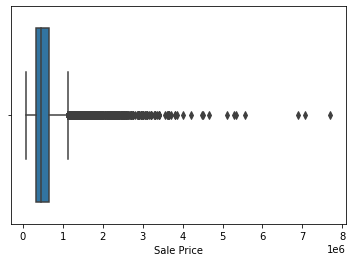

In [35]:
## treating outliers
sns.boxplot(x = data['Sale Price'])

In [36]:
q1 = data['Sale Price'].quantile(0.25)
q3 = data['Sale Price'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
print(upper_limit, lower_limit)

1129575.0 -162625.0


In [37]:
def limit_imputer(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_limit
    else:
        return value

In [38]:
data['Sale Price']= data['Sale Price'].apply(limit_imputer)
data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

<AxesSubplot:xlabel='Sale Price'>

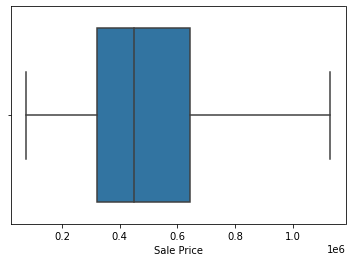

In [39]:
sns.boxplot(x = data['Sale Price'])

In [40]:
## treating missing values in target variable
data.dropna(inplace = True, axis = 0, subset = ['Sale Price'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

## 2. Treating independent variables 

In [41]:
## treating missing values
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [42]:
# missing values in numerical variables 
num_columns = ['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)',
              'Area of the House from Basement (in Sqft)','Latitude','Longitude',
               'Living Area after Renovation (in Sqft)']
from sklearn.impute import SimpleImputer
imputer = SimpleImputer( missing_values = np.nan, strategy = 'median')
data[num_columns] = imputer.fit_transform(data[num_columns])

In [43]:
# missing values in categorical variable
data['Zipcode'].shape

(21609,)

In [44]:
column = data['Zipcode'].values.reshape(-1,1)
column.shape

(21609, 1)

In [45]:
imputer2 = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data['Zipcode'] = imputer2.fit_transform(column)

In [46]:
## changing data type of num variable which should be categorical variable 
data['Zipcode'] = data['Zipcode'].astype(object)

In [47]:
## converting data from cat. var. to numerical
data['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [48]:
mapping = {'None':'0','Once':'1','Twice':'2', 'Thrice':'3','Four':'4'}
data['No of Times Visited']= data['No of Times Visited'].map(mapping)
data['No of Times Visited'].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

In [49]:
## creating new imp column from existing data
data['Ever renovate']= np.where(data['Renovated Year']== 0,'No', 'Yes')
data['Purchase year']= pd.DatetimeIndex(data['Date House was Sold']).year
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever renovate,Purchase year
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No,2017
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes,2017
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No,2016
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,No,2017
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,No,2016


In [50]:
data['Years since Renovation']= np.where(data['Ever renovate']== 'Yes',
                                        abs(data['Purchase year']- data['Renovated Year']), 0 )
data.drop(columns = ['Purchase year','Date House was Sold','Renovated Year'], inplace = True)
data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever renovate,Years since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [51]:
## now we have four var. which are categorical type, we want to decide whether to keep or not
## we will check they have impact on target variable or not, and decide accordingly
## for this we use ANOVA

from statsmodels.formula.api import ols
import statsmodels.api as sm

In [52]:
data = data.rename(columns = {'Sale Price':'Sale_Price'})
data = data.rename(columns = {'Waterfront View':'Waterfront_view'})
data = data.rename(columns = {'Condition of the House':'Condition'})
data = data.rename(columns = {'Ever renovate':'Ever_renovate'})

In [53]:
mod = ols('Sale_Price ~ Condition', data = data).fit()
sm.stats.anova_lm(mod, typ = 2)

,sum_sq,df,F,PR(>F)
Condition,1.441831e+13,4.0,58.25563,5.447605e-49
Residual,1.336752e+15,21604.0,NaN,NaN


In [54]:
mod = ols ('Sale_Price ~ Waterfront_view', data= data).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
Waterfront_view,3.283737e+13,1.0,538.192683,1.275558e-117
Residual,1.318333e+15,21607.0,NaN,NaN


In [55]:
mod = ols('Sale_Price ~ Zipcode', data = data).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
Zipcode,6.859657e+14,69.0,321.902033,0.0
Residual,6.652044e+14,21539.0,NaN,NaN


In [56]:
mod = ols('Sale_Price ~ Ever_renovate',data= data).fit()
sm.stats.anova_lm(mod, typ = 2)

,sum_sq,df,F,PR(>F)
Ever_renovate,1.998463e+13,1.0,324.378469,5.419055e-72
Residual,1.331185e+15,21607.0,NaN,NaN


In [57]:
## we concluded that all 4 variables has high impact on target variable
## we will create dummy variables for all of them.
## getting dummies for first three (not zipcode)
data = pd.get_dummies(data, columns = ['Condition','Waterfront_view','Ever_renovate'], drop_first = True)

In [58]:
zip_table = data.groupby('Zipcode').agg({'Sale_Price':'mean'}).sort_values('Sale_Price',ascending= True)
zip_table['zip_group']= pd.cut(zip_table['Sale_Price'],bins=10,
                              labels = ['0','1','2','3','4','5','6','7','8','9'], include_lowest = True)

In [59]:
zip_table= zip_table.drop(columns=['Sale_Price'])
zip_table

,zip_group
Zipcode,
98002.0,0
98168.0,0
98032.0,0
98001.0,0
98148.0,0
...,...
98109.0,6
98112.0,7
98040.0,8


In [60]:
data = pd.merge(data, zip_table,
               left_on = 'Zipcode',
               how = 'left',
               right_index = True)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ID                                         21609 non-null  int64   
 1   Sale_Price                                 21609 non-null  float64 
 2   No of Bedrooms                             21609 non-null  int64   
 3   No of Bathrooms                            21609 non-null  float64 
 4   Flat Area (in Sqft)                        21609 non-null  float64 
 5   Lot Area (in Sqft)                         21609 non-null  float64 
 6   No of Floors                               21609 non-null  float64 
 7   No of Times Visited                        21609 non-null  object  
 8   Overall Grade                              21609 non-null  int64   
 9   Area of the House from Basement (in Sqft)  21609 non-null  float64 
 10  Basement A

In [62]:
data = pd.get_dummies(data, columns= ["zip_group"], drop_first= True)
data

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Ever_renovate_Yes,zip_group_1,zip_group_2,zip_group_3,zip_group_4,zip_group_5,zip_group_6,zip_group_7,zip_group_8,zip_group_9
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,1,0,1,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,...,0,0,0,1,0,0,0,0,0,0
21609,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,...,0,1,0,0,0,0,0,0,0,0
21610,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,...,0,0,0,1,0,0,0,0,0,0
21611,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,...,0,0,0,0,1,0,0,0,0,0


In [64]:
data = data.drop(columns= ['Zipcode'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Sale_Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  float64
 5   Lot Area (in Sqft)                         21609 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   No of Times Visited                        21609 non-null  object 
 8   Overall Grade                              21609 non-null  int64  
 9   Area of the House from Basement (in Sqft)  21609 non-null  float64
 10  Basement Area (in Sqft

In [65]:
data.to_csv('Preprocessed_linear_regression_project', index = False)